In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

df = pd.read_csv("Salzburg Card Auswertung(August).csv", sep=";", encoding="utf-8-sig")

df["TransDatum"] = pd.to_datetime(df["TransDatum"].str.strip(),
                                  format="%d.%m.%Y %H:%M:%S", errors="coerce")

df = df[df["TransDatum"].notna()].copy()

df["Wochentag"] = df["TransDatum"].dt.day_name()

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nMissing per column:\n", df.isna().sum().sort_values(ascending=False))

Shape: (35481, 6)

Columns: ['KNr', 'KTyp', 'AlterName', 'AKZName', 'TransDatum', 'Wochentag']

Dtypes:
 KNr                    int64
KTyp                  object
AlterName             object
AKZName               object
TransDatum    datetime64[ns]
Wochentag             object
dtype: object

Missing per column:
 KNr           0
KTyp          0
AlterName     0
AKZName       0
TransDatum    0
Wochentag     0
dtype: int64


In [6]:
for col in ["KTyp", "AlterName", "AKZName"]:
    if col in df.columns:
        print(f"\nTop 10: {col}")
        print(df[col].value_counts().head(10))


Top 10: KTyp
KTyp
24 Stunden Erwachsener       14526
48 Stunden Erwachsener       10906
72 Stunden Erwachsener        5485
48 Stunden Kind               1957
24 Stunden Kind               1361
72 Stunden Kind                853
6 Tageskarte EW SLC PLUS       191
12 Tageskarte EW SLC PLUS      118
6 Tageskarte KI SLC PLUS        49
12 Tageskarte KI SLC PLUS       35
Name: count, dtype: int64

Top 10: AlterName
AlterName
Erwachsen        30917
Kind              4171
Erwachsen SLC      309
Kind SLC            84
Name: count, dtype: int64

Top 10: AKZName
AKZName
Festungsbahn Bergfahrt 3 XML         5688
Festungsbahn Talfahrt 1 XML          5314
Geburtshaus                          4174
Schloss & Wasserspiele Hellbrunn     2791
Wohnhaus                             2431
Untersberg Bergfahrt 1               2189
Untersberg Talfahrt 1                2136
Fahrt Salzburg Stadt Schiff-fahrt    2054
Domquartier                          1506
Mönchsbergaufzug Bergfahrt 2 XML     1447
Name: count, 

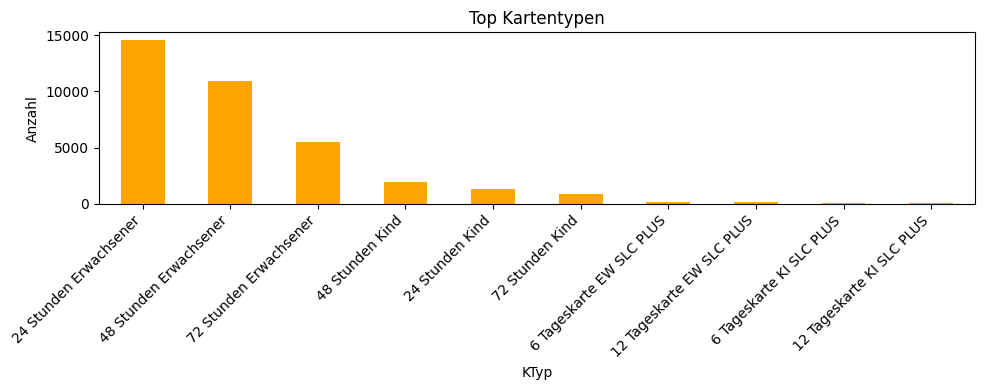

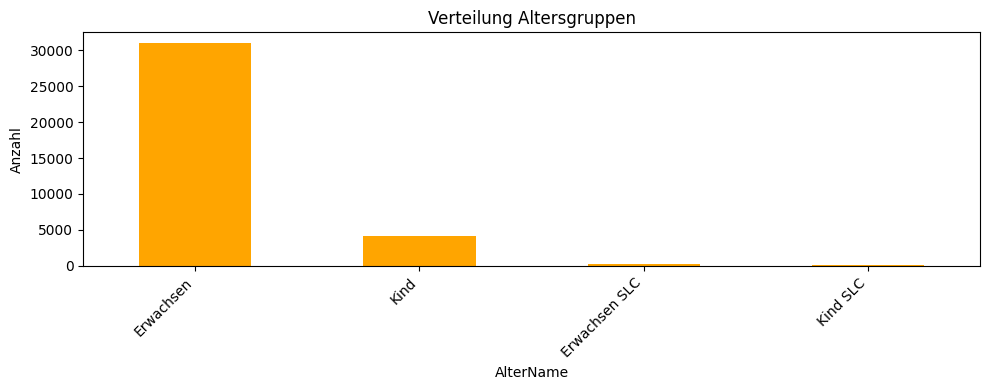

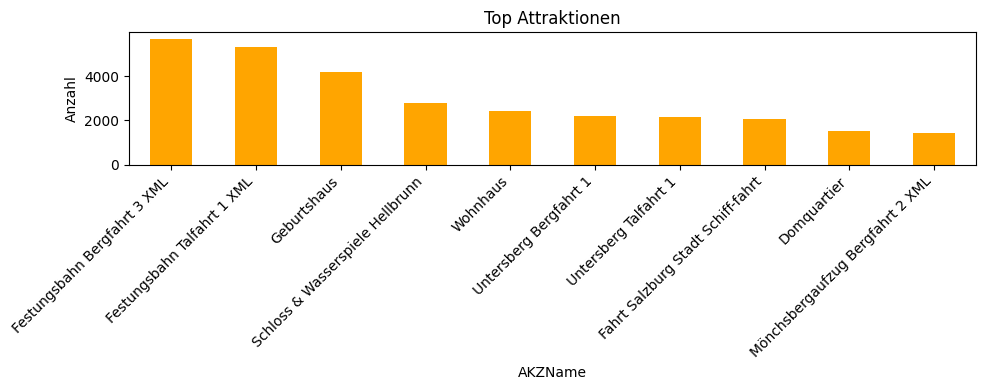

In [15]:
plot_cols = {
    "KTyp": "Top Kartentypen",
    "AlterName": "Verteilung Altersgruppen",
    "AKZName": "Top Attraktionen"
}

for col, title in plot_cols.items():
    if col in df.columns:
        plt.figure(figsize=(10,4))
        df[col].value_counts().head(10).plot(kind="bar", color="orange")
        plt.title(title)
        plt.ylabel("Anzahl")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

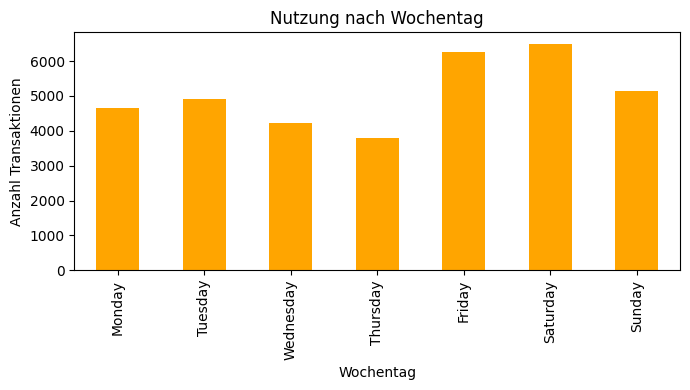

In [7]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_usage = df["Wochentag"].value_counts().reindex(weekday_order, fill_value=0)

plt.figure(figsize=(7,4))
weekday_usage.plot(kind="bar", color="orange")
plt.title("Nutzung nach Wochentag")
plt.ylabel("Anzahl Transaktionen")
plt.xlabel("Wochentag")
plt.tight_layout(); plt.show()

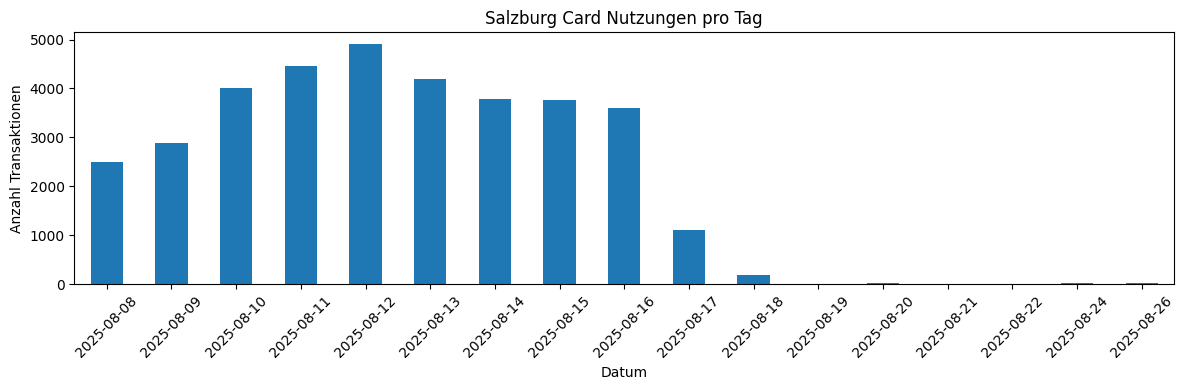

Zeitraum: 2025-08-08 → 2025-08-26 | Tage: 17


In [8]:
daily = df.groupby(df["TransDatum"].dt.date).size()

plt.figure(figsize=(12,4))
daily.plot(kind="bar")
plt.title("Salzburg Card Nutzungen pro Tag")
plt.ylabel("Anzahl Transaktionen")
plt.xlabel("Datum")
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

print("Zeitraum:", daily.index.min(), "→", daily.index.max(), "| Tage:", len(daily))

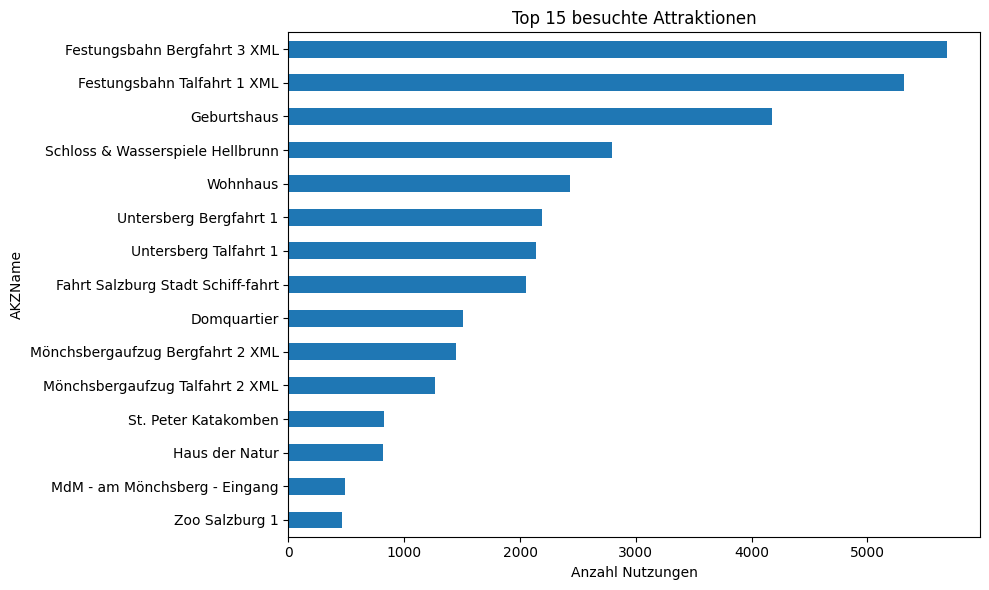

In [9]:
top_akz = df["AKZName"].value_counts().head(15)

plt.figure(figsize=(10,6))
top_akz.sort_values().plot(kind="barh")
plt.title("Top 15 besuchte Attraktionen")
plt.xlabel("Anzahl Nutzungen")
plt.tight_layout(); plt.show()

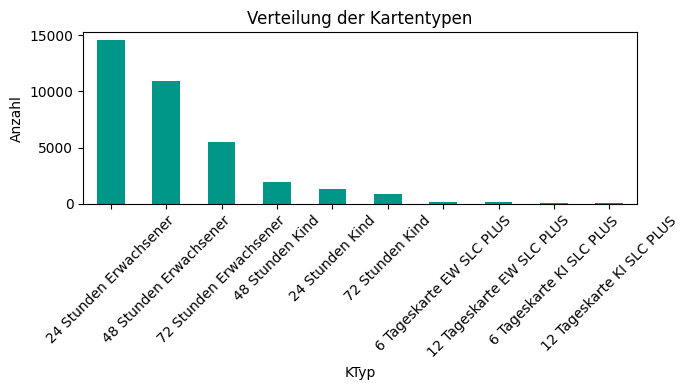

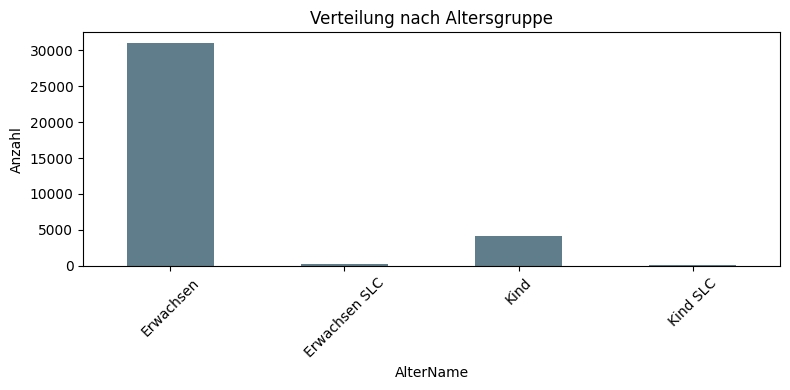

In [10]:
if "KTyp" in df.columns:
    plt.figure(figsize=(7,4))
    df["KTyp"].value_counts().plot(kind="bar", color="#009688")
    plt.title("Verteilung der Kartentypen")
    plt.ylabel("Anzahl")
    plt.xticks(rotation=45)
    plt.tight_layout(); plt.show()

if "AlterName" in df.columns:
    plt.figure(figsize=(8,4))
    df["AlterName"].value_counts().sort_index().plot(kind="bar", color="#607d8b")
    plt.title("Verteilung nach Altersgruppe")
    plt.ylabel("Anzahl")
    plt.xticks(rotation=45)
    plt.tight_layout(); plt.show()

KTyp,12 Tageskarte EW SLC PLUS,12 Tageskarte KI SLC PLUS,24 Stunden Erwachsener,24 Stunden Kind,48 Stunden Erwachsener,48 Stunden Kind,6 Tageskarte EW SLC PLUS,6 Tageskarte KI SLC PLUS,72 Stunden Erwachsener,72 Stunden Kind
AKZName,,,,,,,,,,
Bibelwelt,0.0,0.0,10.0,0.0,5.0,1.0,0.0,0.0,10.0,0.0
Domquartier,7.0,1.0,578.0,24.0,521.0,46.0,9.0,0.0,290.0,30.0
Fahrt Salzburg Stadt Schiff-fahrt,7.0,2.0,791.0,73.0,652.0,126.0,21.0,6.0,322.0,54.0
Festspielhaus Salzburg,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,5.0,0.0
Festungsbahn Bergfahrt 1,0.0,0.0,5.0,0.0,7.0,3.0,0.0,0.0,1.0,0.0


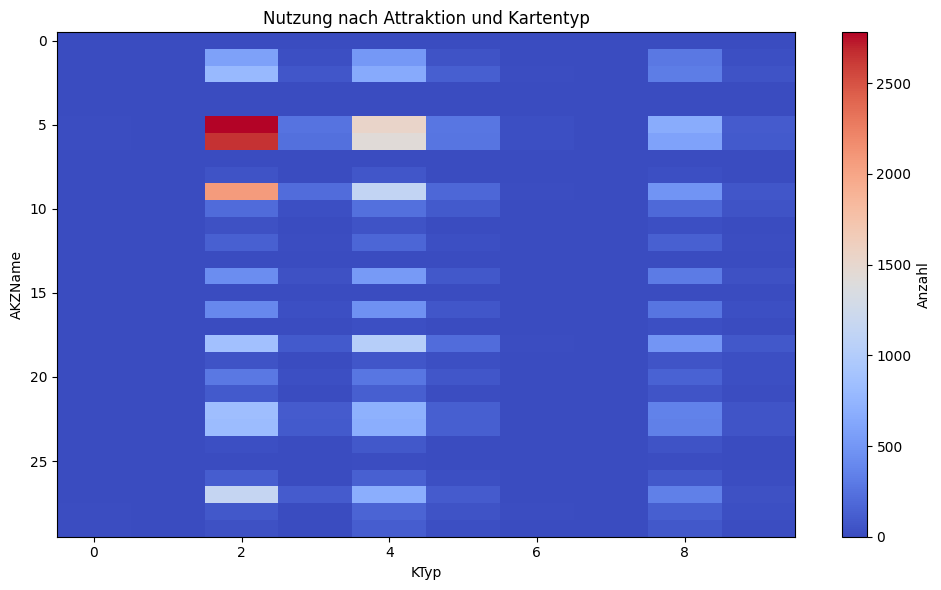

In [11]:
if {"AKZName","KTyp"}.issubset(df.columns):
    pivot = df.pivot_table(index="AKZName", columns="KTyp", values="KNr", aggfunc="count").fillna(0)
    display(pivot.head())

    plt.figure(figsize=(10,6))
    plt.imshow(pivot, aspect="auto", cmap="coolwarm")
    plt.title("Nutzung nach Attraktion und Kartentyp")
    plt.xlabel("KTyp"); plt.ylabel("AKZName")
    plt.colorbar(label="Anzahl")
    plt.tight_layout(); plt.show()

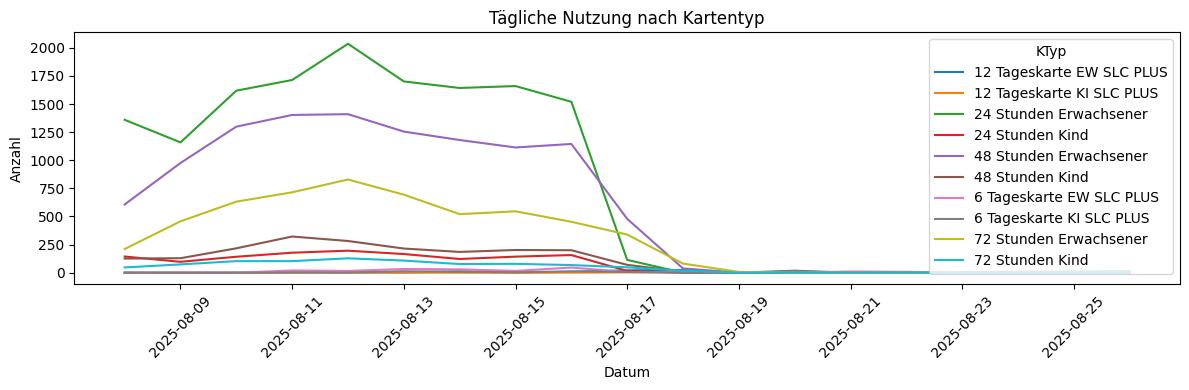

In [12]:
if {"TransDatum","KTyp"}.issubset(df.columns):
    daily_type = df.groupby([df["TransDatum"].dt.date, "KTyp"]).size().unstack(fill_value=0)
    plt.figure(figsize=(12,4))
    daily_type.plot(ax=plt.gca())
    plt.title("Tägliche Nutzung nach Kartentyp")
    plt.ylabel("Anzahl")
    plt.xlabel("Datum")
    plt.xticks(rotation=45)
    plt.tight_layout(); plt.show()

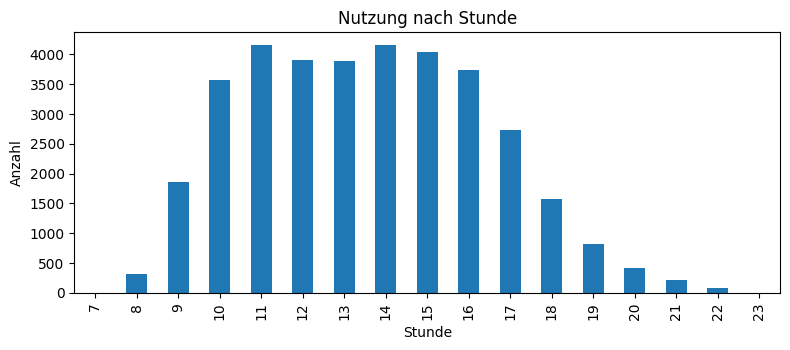

In [13]:
df["Stunde"] = df["TransDatum"].dt.hour
hourly = df["Stunde"].value_counts().sort_index()

plt.figure(figsize=(8,3.6))
hourly.plot(kind="bar")
plt.title("Nutzung nach Stunde")
plt.xlabel("Stunde"); plt.ylabel("Anzahl")
plt.tight_layout(); plt.show()

In [ ]:
daily_counts = df.groupby(df["TransDatum"].dt.date).size().rename("y").to_frame()

daily_counts["Wochentag"] = pd.to_datetime(daily_counts.index).day_name()
X = pd.get_dummies(daily_counts["Wochentag"], drop_first=True)
y = daily_counts["y"].to_numpy()
X = X.to_numpy()

X_int = np.column_stack([np.ones(len(X)), X])

rng = np.random.default_rng(42)
idx = rng.permutation(len(X_int))
n_test = max(1, int(0.2 * len(idx)))
test_idx, train_idx = idx[:n_test], idx[n_test:]

Xtr, Xte = X_int[train_idx], X_int[test_idx]
ytr, yte = y[train_idx], y[test_idx]

beta, *_ = np.linalg.lstsq(Xtr, ytr, rcond=None)
y_pred = Xte @ beta


mse = np.mean((yte - y_pred)**2)
rmse = np.sqrt(mse)
ss_tot = np.sum((yte - yte.mean())**2)
ss_res = np.sum((yte - y_pred)**2)
r2 = 1 - ss_res/ss_tot

print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))
print("R² :", round(r2,3))

feat_names = ["Intercept"] + pd.get_dummies(daily_counts["Wochentag"], drop_first=True).columns.tolist()
coef = pd.Series(beta, index=feat_names)
display(coef)

MSE: 21719728.33
RMSE: 4660.44
R² : -293508.842


Intercept    2091.666667
Monday        229.833333
Saturday     1159.333333
Sunday       -381.666667
Thursday     -197.166667
Tuesday      2811.333333
Wednesday    2096.333333
dtype: float64

In [16]:
df["Stunde"] = df["TransDatum"].dt.hour

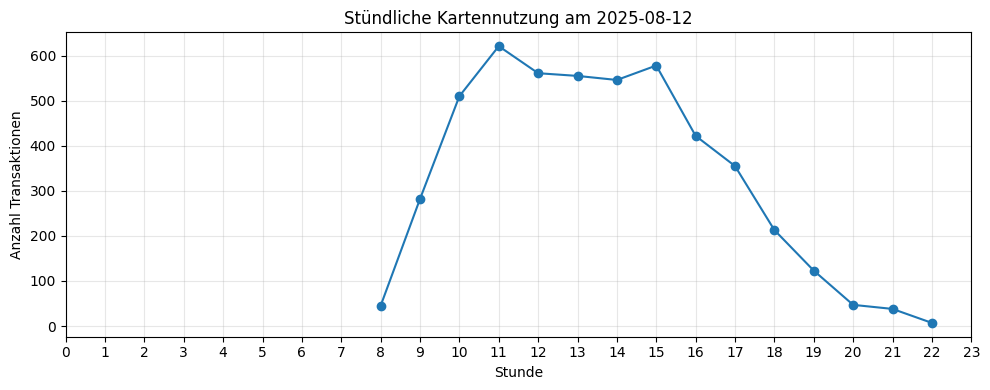

Stunde
8      45
9     282
10    510
11    621
12    561
13    555
14    546
15    578
16    422
17    355
18    213
19    123
20     47
21     38
22      7
Name: count, dtype: int64


In [ ]:
tag = "2025-08-12" 
df_tag = df[df["TransDatum"].dt.date.astype(str) == tag]

stundennutzung = df_tag["Stunde"].value_counts().sort_index()

plt.figure(figsize=(10,4))
stundennutzung.plot(kind="line", marker="o")
plt.title(f"Stündliche Kartennutzung am {tag}")
plt.xlabel("Stunde")
plt.ylabel("Anzahl Transaktionen")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(stundennutzung)

In [18]:
daily_counts = df.groupby(df["TransDatum"].dt.date).size()
top_day = daily_counts.idxmax()
print("Tag mit den meisten Nutzungen:", top_day, "| Anzahl:", daily_counts.max())

Tag mit den meisten Nutzungen: 2025-08-12 | Anzahl: 4903


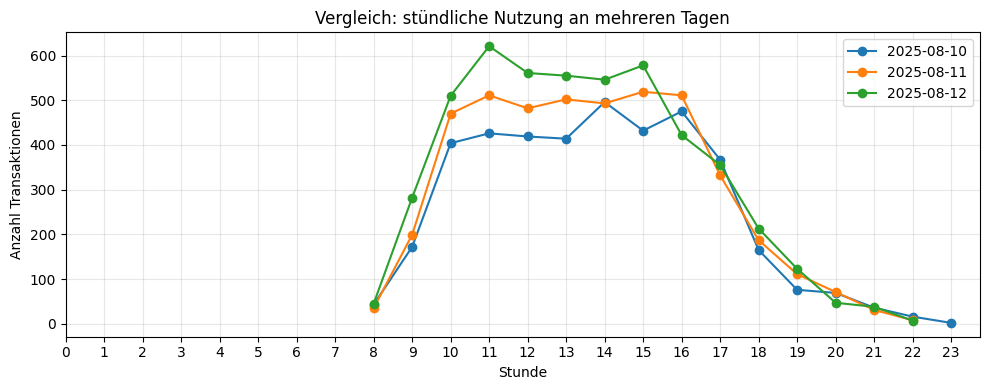

In [ ]:
tage = ["2025-08-10","2025-08-11","2025-08-12"] 
plt.figure(figsize=(10,4))

for t in tage:
    df_day = df[df["TransDatum"].dt.date.astype(str) == t]
    hourly = df_day["Stunde"].value_counts().sort_index()
    plt.plot(hourly.index, hourly.values, marker="o", label=t)

plt.title("Vergleich: stündliche Nutzung an mehreren Tagen")
plt.xlabel("Stunde")
plt.ylabel("Anzahl Transaktionen")
plt.xticks(range(0,24))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

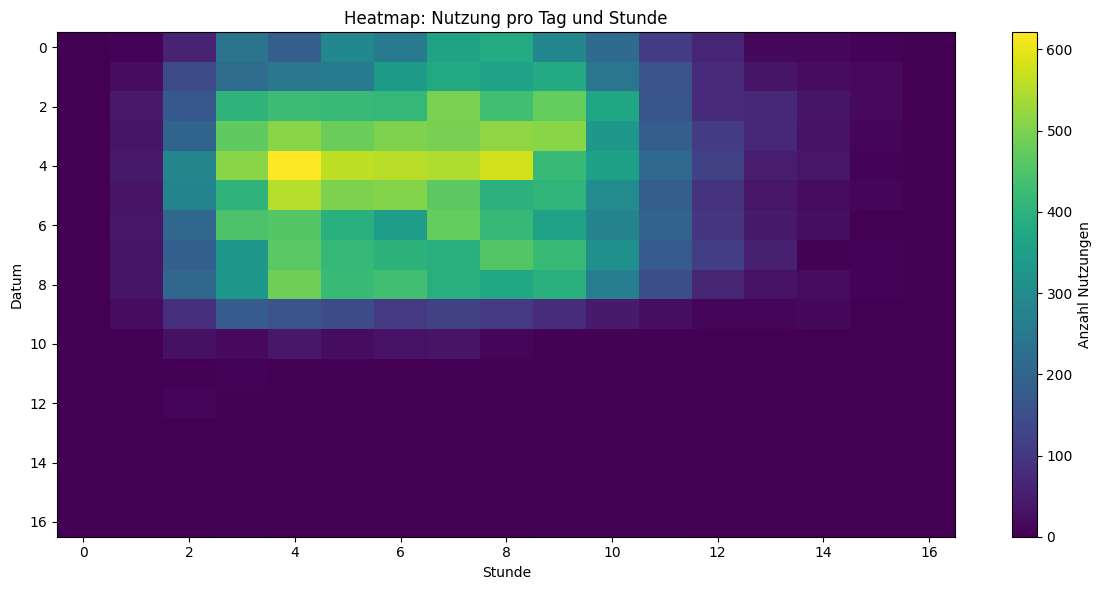

In [20]:
heat = df.pivot_table(
    index=df["TransDatum"].dt.date,
    columns=df["Stunde"],
    values="KNr",
    aggfunc="count"
).fillna(0)

plt.figure(figsize=(12,6))
plt.imshow(heat, aspect="auto", cmap="viridis")
plt.title("Heatmap: Nutzung pro Tag und Stunde")
plt.xlabel("Stunde")
plt.ylabel("Datum")
plt.colorbar(label="Anzahl Nutzungen")
plt.tight_layout()
plt.show()